## Лабараторная работа #3
### Корязин Егор 20-ИВТ-3
#### Вариант 32

#### Набор данных: activity 
#### Классификаторы: классификатор K ближайших соседей и  линейный классификатор

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

## Задание 1: Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [77]:
X = pd.read_csv('X_train.txt', header=None, delimiter=r"\s+", encoding = 'utf-8')
y = pd.read_csv('y_train.txt', header=None, delimiter=r"\s+", encoding = 'utf-8')
subject = pd.read_csv('subject_train.txt', header=None, delimiter=r"\s+", encoding = 'utf-8')
body_acc_x = pd.read_csv('body_acc_x_train.txt', header=None, delimiter=r"\s+", encoding = 'utf-8')
body_acc_y = pd.read_csv('body_acc_y_train.txt', header=None, delimiter=r"\s+", encoding = 'utf-8')
body_acc_z = pd.read_csv('body_acc_z_train.txt', header=None, delimiter=r"\s+", encoding = 'utf-8')
body_gyro_x = pd.read_csv('body_gyro_x_train.txt', header=None, delimiter=r"\s+", encoding = 'utf-8')
body_gyro_y = pd.read_csv('body_gyro_y_train.txt', header=None, delimiter=r"\s+", encoding = 'utf-8')
body_gyro_z = pd.read_csv('body_gyro_z_train.txt', header=None, delimiter=r"\s+", encoding = 'utf-8')
total_acc_x = pd.read_csv('total_acc_x_train.txt', header=None, delimiter=r"\s+", encoding = 'utf-8')
total_acc_y = pd.read_csv('total_acc_y_train.txt', header=None, delimiter=r"\s+", encoding = 'utf-8')
total_acc_z = pd.read_csv('total_acc_z_train.txt', header=None, delimiter=r"\s+", encoding = 'utf-8')

In [78]:
df = pd.DataFrame({
    'X':list(X[0]),
    'Y':list(y[0]),
    'subject':list(subject[0]),
    'body_acc_x':list(body_acc_x[0]),
    'body_acc_y':list(body_acc_y[0]),
    'body_acc_z':list(body_acc_z[0]),
    'body_gyro_x':list(body_gyro_x[0]),
    'body_gyro_y':list(body_gyro_y[0]),
    'body_gyro_z':list(body_gyro_z[0]),
    'total_acc_x':list(total_acc_x[0]),
    'total_acc_y':list(total_acc_y[0]),
    'total_acc_z':list(total_acc_z[0]),    
})

In [56]:
df

,X,Y,subject,body_acc_x,body_acc_y,body_acc_z,body_gyro_x,body_gyro_y,body_gyro_z,total_acc_x,total_acc_y,total_acc_z
0,0.288585,5,1,0.000181,0.010767,0.055561,0.030191,0.066014,0.022859,1.012817,-0.123217,0.102934
1,0.278419,5,1,0.001094,-0.004688,-0.026860,0.017111,0.006123,0.012268,1.018851,-0.123976,0.097930
2,0.279653,5,1,0.003531,0.004456,-0.005915,0.026189,-0.000238,0.002159,1.023127,-0.120016,0.091117
3,0.279174,5,1,-0.001772,-0.010185,0.001053,-0.037516,-0.012886,-0.000873,1.017682,-0.133404,0.095152
4,0.276629,5,1,0.000087,-0.003857,-0.013333,-0.019429,-0.008612,-0.001574,1.019952,-0.128731,0.080841
...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,2,30,0.388873,-0.049144,0.383827,-0.503212,-0.097334,0.456170,1.374753,-0.235153,0.309481
7348,0.273853,2,30,0.711864,-0.371869,0.262037,-0.174347,-0.135794,0.453560,1.713028,-0.563117,0.209530
7349,0.273387,2,30,-0.226717,0.056845,0.228927,0.118356,0.426702,0.300847,0.754892,-0.171183,0.174587
7350,0.289654,2,30,-0.064806,-0.005741,0.310254,-0.378872,0.164278,0.217504,0.927927,-0.223801,0.262814


### Описание набора данных:
#### X - Тренировачный набор
#### Y - Метки тренировок
#### Subject - Номер испытуемого  
#### Body ACC XYZ- Ускорение объекта
#### Body gyro XYZ- вектор угловой скорости (рад/с)
#### Total Acc XYZ- сигнал ускорения от оси XYZ акселерометра  

## Задание 2: Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [121]:
lenBefore = len(df)

df = df.drop_duplicates().reset_index(drop=True)

lenNow = len(df_copy)

print("Количетсво строк ДО удаления дубликатов:", lenBefore)
print("Количетсво строк ПОСЛЕ удаления дубликатов:", lenNow)
print("Количество дубликатов: " + str(lenBefore - lenNow))

Количетсво строк ДО удаления дубликатов: 7352
Количетсво строк ПОСЛЕ удаления дубликатов: 7352
Количество дубликатов: 0


## Задание 3: Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

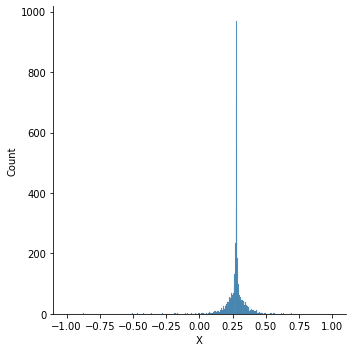

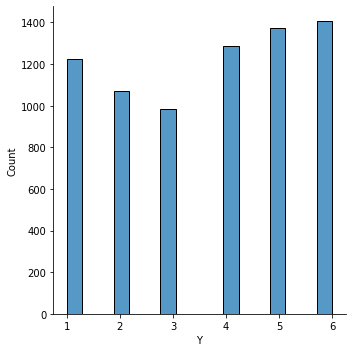

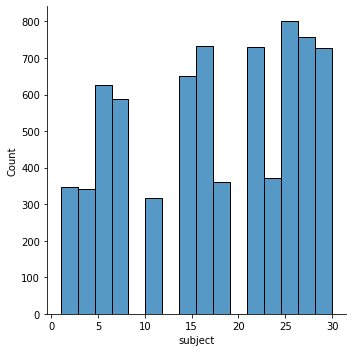

In [60]:
sns.displot(df['X'], kde = False)
sns.displot(df['Y'], kde = False)
sns.displot(df['subject'], kde = False)


LogisticRegression: ROC AUC=0.903


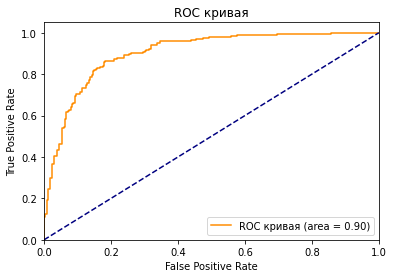

In [70]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

lr_probs = model.predict_proba(testX)

lr_probs = lr_probs[:, 1]

lr_auc = roc_auc_score(testy, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))

fpr, tpr, treshold = roc_curve(testy, lr_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.legend(loc="lower right")
plt.show()

## Задание 4: Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

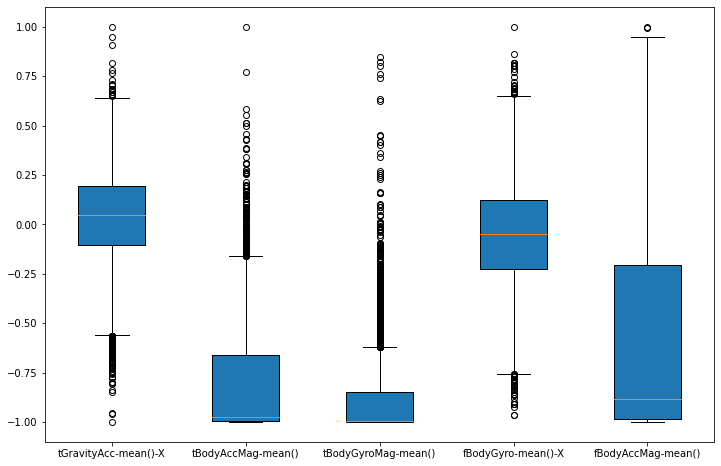

In [80]:
columns = [np.array(X)[:,35], np.array(X)[:,180], np.array(X)[:,320], np.array(X)[:,453], np.array(X)[:,502]]
labels = ['tGravityAcc-mean()-X', 'tBodyAccMag-mean()', 'tBodyGyroMag-mean()', 'fBodyGyro-mean()-X', 'fBodyAccMag-mean()']

fix, ax = plt.subplots(figsize=(12,8))
ax.boxplot(columns, patch_artist=True)
plt.xticks([1,2,3,4,5], labels)
plt.show()

In [89]:
import pandas as pd
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfd = pd.DataFrame(x_scaled)
dfd

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.644292,0.8,0.0,0.430960,0.551781,0.561125,0.539471,0.457405,0.575960,0.565120,0.445019,0.553686
1,0.639209,0.8,0.0,0.431418,0.542321,0.506893,0.537100,0.448021,0.573236,0.567524,0.444684,0.551570
2,0.639827,0.8,0.0,0.432642,0.547918,0.520675,0.538745,0.447024,0.570636,0.569228,0.446431,0.548688
3,0.639587,0.8,0.0,0.429979,0.538955,0.525259,0.527197,0.445042,0.569856,0.567059,0.440524,0.550395
4,0.638314,0.8,0.0,0.430913,0.542829,0.515793,0.530476,0.445712,0.569676,0.567963,0.442586,0.544343
...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.649833,0.2,1.0,0.626183,0.515106,0.777124,0.442780,0.431810,0.687411,0.709315,0.395627,0.641034
7348,0.636926,0.2,1.0,0.788409,0.317549,0.696986,0.502394,0.425783,0.686740,0.844083,0.250912,0.598765
7349,0.636694,0.2,1.0,0.316998,0.579988,0.675200,0.555452,0.513923,0.647461,0.462363,0.423853,0.583988
7350,0.644827,0.2,1.0,0.398319,0.541676,0.728713,0.465319,0.472803,0.626024,0.531300,0.400636,0.621299


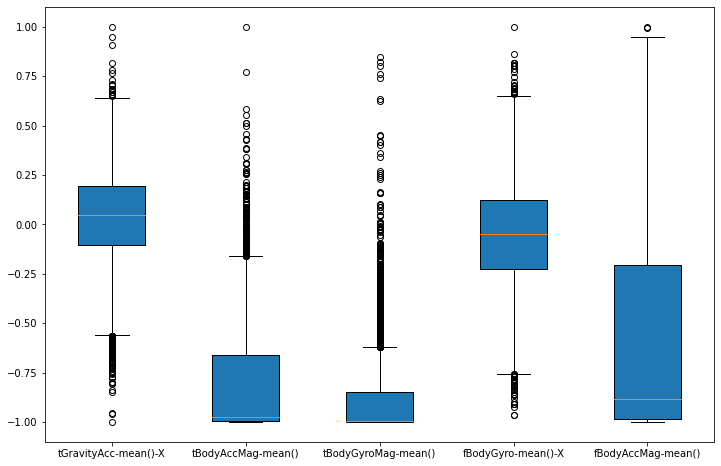

In [95]:
columns = [np.array(X)[:,35], np.array(X)[:,180], np.array(X)[:,320], np.array(X)[:,453], np.array(X)[:,502]]
labels = ['tGravityAcc-mean()-X', 'tBodyAccMag-mean()', 'tBodyGyroMag-mean()', 'fBodyGyro-mean()-X', 'fBodyAccMag-mean()']

fix, ax = plt.subplots(figsize=(12,8))
ax.boxplot(columns, patch_artist=True)
plt.xticks([1,2,3,4,5], labels)
plt.show()

## Задание 5: Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

#### Нет категориальных признаков

## Задание 6: Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

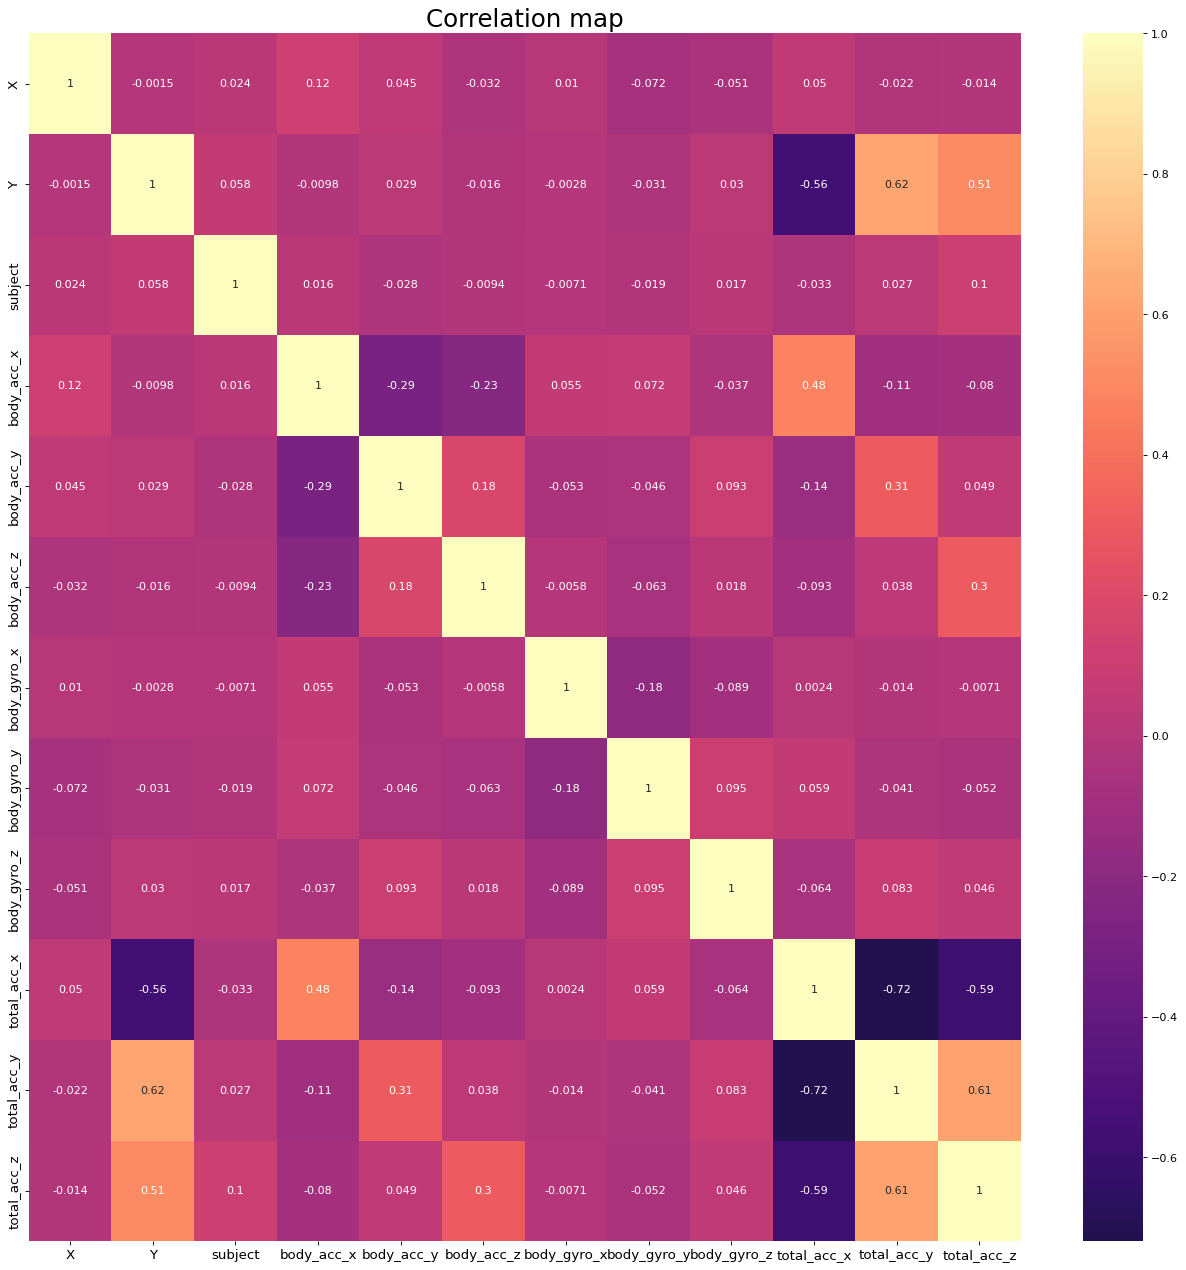

,X,Y,subject,body_acc_x,body_acc_y,body_acc_z,body_gyro_x,body_gyro_y,body_gyro_z,total_acc_x,total_acc_y,total_acc_z
X,1.000000,-0.001508,0.024181,0.119367,0.044684,-0.031716,0.010023,-0.072176,-0.051144,0.049913,-0.021573,-0.014038
Y,-0.001508,1.000000,0.057717,-0.009764,0.028639,-0.016164,-0.002796,-0.031236,0.029916,-0.564311,0.618369,0.513937
subject,0.024181,0.057717,1.000000,0.015678,-0.027995,-0.009443,-0.007080,-0.018869,0.016853,-0.033134,0.026500,0.102895
body_acc_x,0.119367,-0.009764,0.015678,1.000000,-0.291185,-0.228826,0.054677,0.071640,-0.036887,0.478417,-0.108022,-0.080497
body_acc_y,0.044684,0.028639,-0.027995,-0.291185,1.000000,0.177304,-0.052757,-0.045817,0.093455,-0.140851,0.307956,0.048719
body_acc_z,-0.031716,-0.016164,-0.009443,-0.228826,0.177304,1.000000,-0.005849,-0.063353,0.017712,-0.093420,0.038349,0.295701
body_gyro_x,0.010023,-0.002796,-0.007080,0.054677,-0.052757,-0.005849,1.000000,-0.184179,-0.088748,0.002375,-0.013788,-0.007070
body_gyro_y,-0.072176,-0.031236,-0.018869,0.071640,-0.045817,-0.063353,-0.184179,1.000000,0.094868,0.059413,-0.040539,-0.051743
body_gyro_z,-0.051144,0.029916,0.016853,-0.036887,0.093455,0.017712,-0.088748,0.094868,1.000000,-0.064288,0.082945,0.046494
total_acc_x,0.049913,-0.564311,-0.033134,0.478417,-0.140851,-0.093420,0.002375,0.059413,-0.064288,1.000000,-0.719233,-0.589759


In [16]:
import seaborn as sns


plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='magma', center=0, annot=True)


plt.title('Correlation map', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

df.corr()


In [57]:
df_corr = df.corr().sum()

print("Максимальную корреляцию имеет: ")
max_cor = df_corr[df_corr == df_corr.max()]
print(max_cor)
df_copy = df.copy()

df_copy.pop(max_cor.index[0])
df_copy

Максимальную корреляцию имеет: 
total_acc_z    1.876714
dtype: float64


,X,Y,subject,body_acc_x,body_acc_y,body_acc_z,body_gyro_x,body_gyro_y,body_gyro_z,total_acc_x,total_acc_y
0,0.288585,5,1,0.000181,0.010767,0.055561,0.030191,0.066014,0.022859,1.012817,-0.123217
1,0.278419,5,1,0.001094,-0.004688,-0.026860,0.017111,0.006123,0.012268,1.018851,-0.123976
2,0.279653,5,1,0.003531,0.004456,-0.005915,0.026189,-0.000238,0.002159,1.023127,-0.120016
3,0.279174,5,1,-0.001772,-0.010185,0.001053,-0.037516,-0.012886,-0.000873,1.017682,-0.133404
4,0.276629,5,1,0.000087,-0.003857,-0.013333,-0.019429,-0.008612,-0.001574,1.019952,-0.128731
...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,2,30,0.388873,-0.049144,0.383827,-0.503212,-0.097334,0.456170,1.374753,-0.235153
7348,0.273853,2,30,0.711864,-0.371869,0.262037,-0.174347,-0.135794,0.453560,1.713028,-0.563117
7349,0.273387,2,30,-0.226717,0.056845,0.228927,0.118356,0.426702,0.300847,0.754892,-0.171183
7350,0.289654,2,30,-0.064806,-0.005741,0.310254,-0.378872,0.164278,0.217504,0.927927,-0.223801


## Задание 7: Заполните пропущенные значения в данных;

In [15]:
df.isna().sum()

X              0
Y              0
subject        0
body_acc_x     0
body_acc_y     0
body_acc_z     0
body_gyro_x    0
body_gyro_y    0
body_gyro_z    0
total_acc_x    0
total_acc_y    0
total_acc_z    0
dtype: int64

#### Нет пропущенных значений

## Задание 8: Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

In [122]:
Data = pd.read_csv('X_train.txt', header=None, delimiter=r"\s+")
x_train = pd.DataFrame(Data)
Data = pd.read_csv('Y_train.txt', header=None, delimiter=r"\s+")
y_train = pd.DataFrame(Data)


In [117]:
knn = KNeighborsClassifier()
grid = {"n_neighbors": range(1, 20, 1), "weights": ['uniform', 'distance']}
gs = GridSearchCV(estimator=knn, param_grid=grid, scoring="accuracy", n_jobs=-1, cv=4, verbose=10)
gs.fit(x_train, y_train)

n = gs.best_estimator_.n_neighbors
best = gs.best_score_
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(x_train, y_train.values.ravel())
knn_predict = knn.predict(x_train)
print("Значение точности:", accuracy_score(y_test.values.ravel(), knn_predict))
print('Лучшая точность:', best)

Fitting 4 folds for each of 38 candidates, totalling 152 fits
Значение точности: 0.9710282916213275
Лучшая точность: 0.8939064200217628


In [ ]:
ppn = Perceptron()
search = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [n for n in range(1, 50)],
}, n_jobs=-1)
search.fit(x_train, y_train)
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print(' Лучшая:', best,"\n",' альфа:', alpha,"\n", 'максимальная иттерация:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(x_train, y_train)
ppn_predict = ppn.predict(X)
print(' Точность:', accuracy_score(y, ppn_predict))

## Задание 9: Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

In [118]:
clf = Perceptron(random_state=0, n_jobs=-1)
parameters = {'max_iter': [500, 1000, 1500],
              'penalty':['l1', 'l2']}
grid = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)
grid.fit(X, y)
print('Наилучшие параметры классификатора:', grid.best_params_)

Наилучшие параметры классификатора: {'max_iter': 500, 'penalty': 'l1'}
